In [1]:
import pandas as pd
import numpy as n
import ROOT as R
#R.enableJSVis()
R.ROOT.EnableImplicitMT()


Welcome to JupyROOT 6.18/04


In [2]:
#Official data from Protezione Civile
urlByProvince = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
urlNational = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
urlByRegion = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'


dfByProvince = pd.read_csv(urlByProvince,na_filter = False)
dfNational = pd.read_csv(urlNational)
dfByRegion = pd.read_csv(urlByRegion)

lastDate=dfNational['data'][len(dfNational)-1]

#dfByProvince.head(5)
#dfNational.head(5)

df={}

province={
    'TO':'Torino',
    'MI':'Milano',
    'LO':'Lodi',
    'RM':'Roma',
    'BG':'Bergamo',
    'FI':'Firenze',
    'AT':'Asti',
    'PV':'Pavia',
    'NA':'Napoli',
    'PD':'Padova',
    'RI':'Rieti'
}

for p in province:
    df[p]=dfByProvince[dfByProvince['sigla_provincia']==p]

for p in n.unique(dfByRegion['denominazione_regione']):
    df[p]=dfByRegion[dfByRegion['denominazione_regione']==p]

population = pd.read_csv('italianPopulation.csv')
population = population.set_index('Territory')
#population.colums=['population']

worldPopulation = pd.read_csv('worldPopulation.csv')
worldPopulation = worldPopulation.set_index('Country Name')
worldPopulation = worldPopulation['2018']
worldPopulation.columns=['Population']
worldPopulation['Hubei']=59170000

print("Last data %s"%lastDate)

Last data 2020-03-29T17:00:00


In [3]:
urlWorldWide = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
dfWorld=pd.read_csv(urlWorldWide)
dfWorld.set_index('Country/Region')
dfWorld.tail(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['TO'].tail(5)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
3915,2020-03-25T17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,2813,,
4043,2020-03-26T17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,3108,,
4171,2020-03-27T17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,3361,,
4299,2020-03-28T17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,3658,,
4427,2020-03-29T17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,3933,,


In [5]:
df['RI'].tail(5)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
3879,2020-03-25T17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,39,,
4007,2020-03-26T17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,41,,
4135,2020-03-27T17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,43,,
4263,2020-03-28T17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,62,,
4391,2020-03-29T17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,76,,


In [6]:
dfNational.tail(5)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
30,2020-03-25T17:00:00,ITA,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445,NaN,NaN
31,2020-03-26T17:00:00,ITA,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,pd-IT-0007,pd-EN-0007
32,2020-03-27T17:00:00,ITA,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN
33,2020-03-28T17:00:00,ITA,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN
34,2020-03-29T17:00:00,ITA,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009


In [7]:
f=R.TF1("ff","TMath::Exp((x+[0])/[1])",0,100)
f.SetParameter(0,13)
f.SetParLimits(0,-100,100)
f.SetParameter(1,3.)
f.SetParLimits(1,0.,40.)


logit=R.TF1("logit","[0]/(1+TMath::Exp(-[1]*(x-[2])))",0,100)
logit.SetParameter(0,1000)
logit.SetParLimits(0,0,100000)
logit.SetParameter(1,3)
logit.SetParLimits(1,0.,30.)
logit.SetParameter(2,5)
logit.SetParLimits(2,0.,40.)

#logitSum=R.TF1("logitSum","[0]/(1+TMath::Exp(-[1]*(x-[2])))+[3]/(1+TMath::Exp(-[5]*(x-[4])))+[6]/(1+TMath::Exp(-[8]*(x-[7])))",0,100)
logitSum=R.TF1("logitSum","[0]/(1+TMath::Exp(-[1]*(x-[2])))+[3]/(1+TMath::Exp(-[5]*(x-[4])))",0,100)
logitSum.SetParameter(0,10000)
logitSum.SetParLimits(0,0,50000)
logitSum.SetParameter(1,3)
logitSum.SetParLimits(1,0.,10.)
logitSum.SetParameter(2,20)
logitSum.SetParLimits(2,0.,100.)
logitSum.SetParameter(3,5000)
logitSum.SetParLimits(3,0.,50000.)
logitSum.SetParameter(4,20)
logitSum.SetParLimits(4,0.,100.)
logitSum.SetParameter(5,1)
logitSum.SetParLimits(5,0.,10.)
#logitSum.SetParameter(6,0)
#logitSum.SetParLimits(6,0.,10000.)
#logitSum.SetParameter(7,5)
#logitSum.SetParLimits(7,0.,100.)
#logitSum.SetParameter(8,1)
#logitSum.SetParLimits(8,0.,10.)

gompertz=R.TF1("gompertz","[0]*TMath::Exp(-[1]*TMath::Exp(-[2]*(x-[3])))",0,100)
gompertz.SetParameter(0,2000)
gompertz.SetParLimits(0,0,10000)
gompertz.SetParameter(1,1)
gompertz.SetParLimits(1,0.,10.)
gompertz.SetParameter(2,1)
gompertz.SetParLimits(2,0.,10.)
gompertz.SetParameter(3,10)
gompertz.SetParLimits(3,0.,100.)


Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/totalInfectedSummary.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/totalInfectedSummary.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/totalInfectedSummary.root has been created


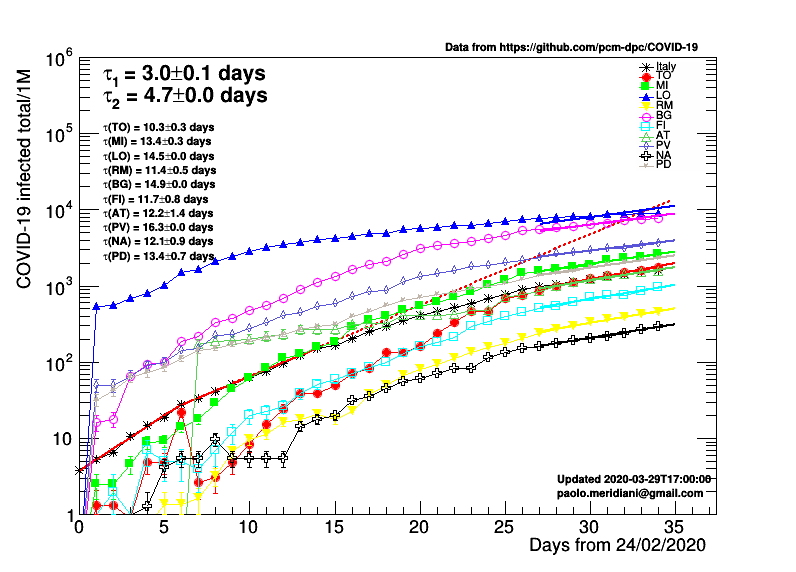

In [8]:
infected=R.TGraphErrors()
infected.SetName("infected")
for i,ni in enumerate(dfNational['totale_casi']):
    infected.SetPoint(i,i,ni/worldPopulation['Italy']*1E6)
    infected.SetPointError(i,0,R.TMath.Sqrt(ni)/worldPopulation['Italy']*1E6)

infectedByProvince={}
for p in province:
    infectedByProvince[p]=R.TGraphErrors()
    infectedByProvince[p].SetName("infected_%s"%p)
    pop=population.loc[province[p],'Population']
    for i,ni in enumerate(df[p]['totale_casi']):
        infectedByProvince[p].SetPoint(i,i,ni/pop*1E6)
        infectedByProvince[p].SetPointError(i,0,R.TMath.Sqrt(ni)/pop*1E6)

leg=R.TLegend(0.8,0.89,0.9,0.7)
leg.SetFillColorAlpha(0,0)
leg.SetBorderSize(0)
leg.SetTextSize(0.02)

c1=R.TCanvas("c1","c1",800,600)
infected.Draw("APL*")
infected.GetXaxis().SetTitle("Days from 24/02/2020")
infected.GetYaxis().SetTitle("COVID-19 infected total/1M")

leg.AddEntry(infected,"Italy","PL*")

t=R.TLatex()
t.SetTextSize(0.04)
infected.Fit("ff","RBQ+","",6,14)
t.DrawLatexNDC(0.13,0.82,"#tau_{2} = %.1f#pm%.1f days"%(f.GetParameter(1),f.GetParError(1)))
infected.Fit("ff","RBQ+","",0,6)
t.DrawLatexNDC(0.13,0.86,"#tau_{1} = %.1f#pm%.1f days"%(f.GetParameter(1),f.GetParError(1)))
fE=infected.GetFunction("ff").Clone('fE')
fE.SetRange(6,infected.GetN())
fE.SetLineStyle(2)
fE.Draw("SAME")
#infected.Fit("logit","RB+","",0,infected.GetN())

infected.GetYaxis().SetLimits(1,1E6)
infected.GetYaxis().SetRangeUser(1,1E6)
c1.SetLogy(1)
c1.SetTicky()

t.SetTextSize(0.02)

for ip,p in enumerate(province):
    if p=='RI':
        continue
    colorG=R.kBlack+ip+1
    if ip==8:
        colorG=R.kBlack
    infectedByProvince[p].SetLineColor(colorG)
    infectedByProvince[p].SetMarkerColor(colorG)
    infectedByProvince[p].SetMarkerStyle(20+ip)
    infectedByProvince[p].SetMarkerSize(1.1)
    infectedByProvince[p].Draw("PLSAME")
    infectedByProvince[p].Fit("ff","RBQ+","",infectedByProvince[p].GetN()-8,infectedByProvince[p].GetN())
    infectedByProvince[p].GetFunction("ff").SetLineColor(colorG)
    leg.AddEntry(infectedByProvince[p],p,"PL")
    t.DrawLatexNDC(0.13,0.77-ip*0.025,"#tau(%s) = %.1f#pm%.1f days"%(p,f.GetParameter(1),f.GetParError(1)))

leg.Draw()
t.DrawLatexNDC(0.56,0.91,'Data from https://github.com/pcm-dpc/COVID-19')
t2=R.TLatex()
t2.SetTextSize(0.02)
t2.DrawLatexNDC(0.7,0.155,'Updated %s'%lastDate)
t2.DrawLatexNDC(0.7,0.13,'paolo.meridiani@gmail.com')

c1.Draw()
for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/totalInfectedSummary"+ext)


 FCN=47.8979 FROM MIGRAD    STATUS=CONVERGED     803 CALLS         804 TOTAL
                     EDM=2.94091e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.19136e+03   2.73419e+02   6.92309e-06   1.03873e-01
   2  p1           3.91626e-01   4.01894e-02   1.49578e-05  -9.90049e-02
   3  p2           1.74128e+01   7.09722e-01   8.39026e-06  -3.66340e-02
   4  p3           1.25040e+04   3.81226e+02   8.20083e-06   1.92882e-01
   5  p4           2.97219e+01   2.95773e-01   2.26789e-06  -5.88337e-01
   6  p5           2.56626e-01   7.03644e-03   2.68472e-06  -6.63197e-02
 FCN=146.025 FROM MIGRAD    STATUS=CONVERGED     142 CALLS         143 TOTAL
                     EDM=6.36291e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE         

Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/summaryNational.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/summaryNational.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/summaryNational.root has been created
Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/summaryNationalLin.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/summaryNationalLin.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/summaryNationalLin.root has been created


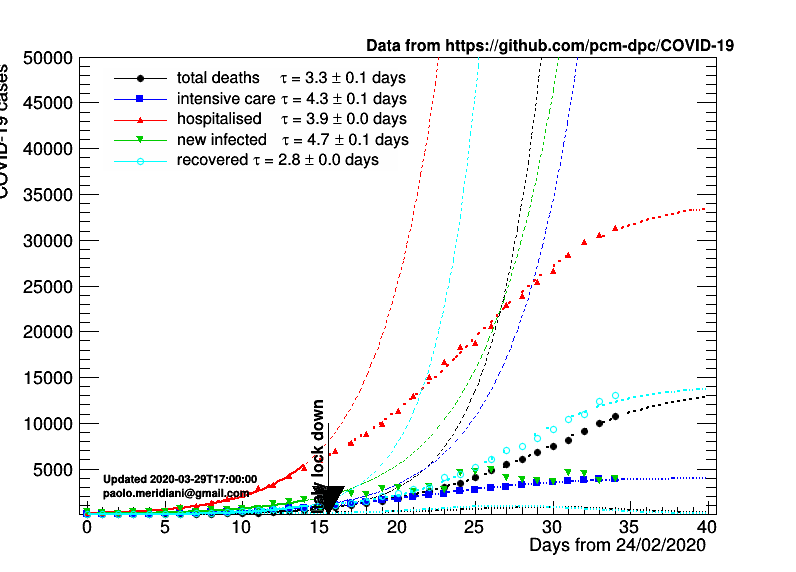

In [9]:
graphs={}
keys=["deceduti","terapia_intensiva","totale_ospedalizzati","nuovi_attualmente_positivi","dimessi_guariti"]

a=R.TH2F("a","a",len(dfNational)+6,-0.5,len(dfNational)+5.5,10,1,1E5)

R.gStyle.SetOptTitle(0)
a.GetXaxis().SetTitle("Days from 24/02/2020")
a.GetYaxis().SetTitle("COVID-19 cases")
a.SetStats(0)
a.Draw()

colors=[
    R.kBlack,
    R.kBlue,
    R.kRed,
    R.kGreen+1,
    R.kCyan,
    R.kMagenta,
    R.kOrange,
    R.kViolet,
]

labels={
    'deceduti':                   'total deaths   ',
    'terapia_intensiva':          'intensive care',
    'totale_ospedalizzati':       'hospitalised   ',
    'nuovi_attualmente_positivi': 'new infected  ',
    'dimessi_guariti': 'recovered'
}

leg1=R.TLegend(0.13,0.88,0.5,0.7)
leg1.SetFillColorAlpha(0,0)
leg1.SetBorderSize(0)
leg1.SetTextSize(0.03)

fEx={}
for ik,k in enumerate(keys):
    graphs[k]=R.TGraphErrors()
    graphs[k].SetName(k)

    for i,ni in enumerate(dfNational[k]):
        graphs[k].SetPoint(i,i,dfNational[k][i])
        graphs[k].SetPointError(i,0,R.TMath.Sqrt(dfNational[k][i]))
    graphs[k].SetLineColor(colors[ik])
    graphs[k].SetMarkerColor(colors[ik])
    graphs[k].SetMarkerStyle(20+ik)
    graphs[k].SetMarkerSize(0.9)
    graphs[k].Draw("PSAME")
    if (k!= 'nuovi_attualmente_positivi'):
        if (k=='terapia_intensiva'):
            graphs[k].Fit("logit","RB+","",0,graphs[k].GetN()+5)
            graphs[k].GetFunction("logit").SetLineColor(colors[ik])
            graphs[k].GetFunction("logit").SetLineStyle(3)
            #if(k == 'deceduti'):
            #graphs[k].GetFunction("logit").DrawDerivative("LSAME")
        else:
            graphs[k].Fit("logitSum","RB+","",0,graphs[k].GetN()+5)
            graphs[k].GetFunction("logitSum").SetLineColor(colors[ik])
            graphs[k].GetFunction("logitSum").SetLineStyle(3)
            if (k=='deceduti' or k=='dimessi_guariti'):
                graphs[k].GetFunction("logitSum").DrawDerivative("LSAME")
            
    graphs[k].Fit("ff","RBQ+","",0,14)
    t.SetTextSize(0.05)
    leg1.AddEntry(graphs[k],"%s #tau = %.1f #pm %.1f days"%(labels[k],f.GetParameter(1),f.GetParError(1)),"PL")
    graphs[k].GetFunction("ff").SetLineColor(colors[ik])
    fEx[k]=graphs[k].GetFunction("ff").Clone("fEx_%s"%k)
    fEx[k].SetRange(14,graphs[k].GetN()+2)
    fEx[k].SetLineWidth(1)
    fEx[k].SetLineStyle(2)
    fEx[k].SetLineColor(colors[ik])
    fEx[k].Draw("SAME")
    

ar=R.TArrow(15.5,10000,15.5,1,0.05,"|>")
ar.Draw()

t.SetTextSize(0.03)
t.DrawLatexNDC(0.46,0.91,'Data from https://github.com/pcm-dpc/COVID-19')

t1=R.TLatex()
t1.SetTextSize(0.03)
t1.SetTextAngle(90)
t1.DrawLatex(15.2,3,'Italy lock down')

leg1.Draw()
t2.DrawLatexNDC(0.13,0.155,'Updated %s'%lastDate)
t2.DrawLatexNDC(0.13,0.13,'paolo.meridiani@gmail.com')

c1.Draw()
for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/summaryNational"+ext)

c1.SetLogy(0)
a.GetYaxis().SetRangeUser(1,5E4)
for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/summaryNationalLin"+ext)


In [10]:
df['Hubei']=dfWorld.loc[dfWorld['Province/State']=='Hubei']
df['Hubei']=df['Hubei'].drop(columns=['Province/State','Country/Region','Lat','Long'])
df['Hubei']=df['Hubei'].transpose()
df['Hubei'].columns=['deaths']

In [11]:
prov={
    'France':'',
    'Germany':'',
    'Korea, South':'',
    'Spain':'',
    'Switzerland':'',
    'US':''
}

for country in ['France','Germany','Spain','Switzerland','Korea, South','US']:
    print(' --- {:s} ---'.format(country))
    if (prov[country] != ''):
        df[country]=dfWorld.loc[(dfWorld['Country/Region']==country) & (dfWorld['Province/State']==prov[country])]
    else:
        df[country]=dfWorld.loc[dfWorld['Country/Region']==country]

    df[country]=df[country].drop(columns=['Province/State','Country/Region','Lat','Long'])
    df[country]=df[country].transpose()
    df[country]=df[country].drop(df[country].columns[[i for i in range(len(df[country].columns)-1)]],axis=1)
    df[country].columns=['deaths']
    print(df[country].tail(3).to_string())
   

 --- France ---
         deaths
3/27/20    1995
3/28/20    2314
3/29/20    2606
 --- Germany ---
         deaths
3/27/20     342
3/28/20     433
3/29/20     533
 --- Spain ---
         deaths
3/27/20    5138
3/28/20    5982
3/29/20    6803
 --- Switzerland ---
         deaths
3/27/20     231
3/28/20     264
3/29/20     300
 --- Korea, South ---
         deaths
3/27/20     139
3/28/20     144
3/29/20     152
 --- US ---
         deaths
3/27/20    1581
3/28/20    2026
3/29/20    2467


 FCN=6.57414 FROM MIGRAD    STATUS=CONVERGED     118 CALLS         119 TOTAL
                     EDM=6.91027e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -7.29432e+00   1.34037e-01   1.04614e-06  -4.25951e-01
   2  p1           3.26449e+00   8.76702e-02   6.23260e-06   7.92986e-02
 FCN=47.8979 FROM MIGRAD    STATUS=CONVERGED     404 CALLS         405 TOTAL
                     EDM=1.59269e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   5.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.97154e+01   4.71421e+00  -4.56019e-06  -3.95228e-01
   2  p1           3.91619e-01   4.28699e-02   1.19038e-05  -8.65838e-02
   3  p2           1.74129e+01   7.45359e-01  -1.96800e-05  -5.93977e-02
   4  p3           2

Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/deathsItalyVsWorld.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/deathsItalyVsWorld.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/deathsItalyVsWorld.root has been created


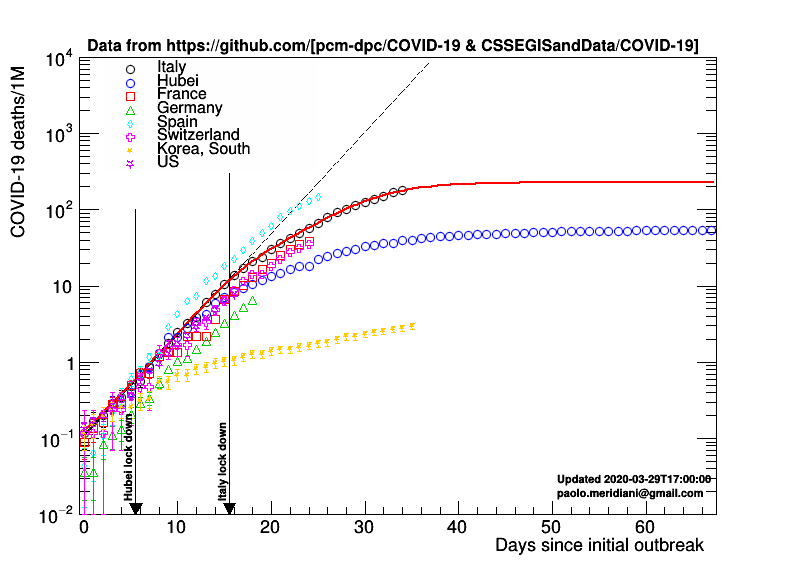

In [12]:
delay={
    'Hubei':3,
    'France':-43,
    'Spain':-42,
    'Germany':-49,
    'Switzerland':-43,
    'Korea, South':-32,
    'US':-51
}

c1.SetLogy(1)

for ic,c in enumerate(['Hubei','France','Germany','Spain','Switzerland','Korea, South','US']):
    graphs['deceduti_%s'%c]=R.TGraphErrors()
    graphs['deceduti_%s'%c].SetName('deceduti_%s'%c)

    cou=c
    if (cou=='Korea, South'):
        cou='Korea, Rep.'
    elif (cou=='US'):
        cou='United States'

    for i,ni in enumerate(df[c]['deaths']):
        
        graphs['deceduti_%s'%c].SetPoint(i,i+delay[c],df[c]['deaths'][i]/worldPopulation[cou]*1E6)
        graphs['deceduti_%s'%c].SetPointError(i,0,R.TMath.Sqrt(df[c]['deaths'][i])/worldPopulation[cou]*1E6)

        
a1=R.TH2F("a1","a1",graphs['deceduti_Hubei'].GetN(),-0.5,graphs['deceduti_Hubei'].GetN()-0.5,10,1E-2,1E4)
a1.GetXaxis().SetTitle("Days since initial outbreak")
a1.GetYaxis().SetTitle("COVID-19 deaths/1M")
a1.SetStats(0)
a1.Draw()

leg2=R.TLegend(0.13,0.89,0.4,0.7)
leg2.SetFillColorAlpha(0,0)
leg2.SetBorderSize(0)
leg2.SetTextSize(0.03)


graphs['decedutiNormalised']=R.TGraphErrors()
graphs['decedutiNormalised'].SetName('decedutiNormalised')

for i in range(0,graphs['deceduti'].GetN()):
    x,y=R.Double(0),R.Double(0)
    graphs['deceduti'].GetPoint(i,x,y)
    graphs['decedutiNormalised'].SetPoint(i,x,y/worldPopulation['Italy']*1E6)
    graphs['decedutiNormalised'].SetPointError(i,0,graphs['deceduti'].GetErrorY(i)/worldPopulation['Italy']*1E6)

logitSum.SetParameter(0,graphs['deceduti'].GetFunction('logitSum').GetParameter(0)/worldPopulation['Italy']*1E6)
logitSum.SetParameter(3,graphs['deceduti'].GetFunction('logitSum').GetParameter(3)/worldPopulation['Italy']*1E6)

#graphs['decedutiNormalised'].Print()
graphs['decedutiNormalised'].Fit("ff","RB+","",0,14)
graphs['decedutiNormalised'].GetFunction("ff").SetLineColor(R.kBlack)
fEx['decedutiNormalised']=graphs['decedutiNormalised'].GetFunction("ff").Clone("fEx_decedutiNormalised")
fEx['decedutiNormalised'].SetRange(14,graphs['decedutiNormalised'].GetN()+2)
fEx['decedutiNormalised'].SetLineWidth(1)
fEx['decedutiNormalised'].SetLineStyle(2)
fEx['decedutiNormalised'].SetLineColor(R.kBlack)
fEx['decedutiNormalised'].Draw("SAME")
graphs['decedutiNormalised'].SetMarkerStyle(24)
graphs['decedutiNormalised'].SetMarkerSize(1.0)
graphs['decedutiNormalised'].SetMarkerColor(R.kBlack)
graphs['decedutiNormalised'].SetLineColor(R.kBlack)
graphs['decedutiNormalised'].Draw("PSAME")
graphs['decedutiNormalised'].Fit("logitSum","RB+")

leg2.AddEntry(graphs['decedutiNormalised'],"Italy","P")

for ic,c in enumerate(['Hubei','France','Germany','Spain','Switzerland','Korea, South','US']):
    graphs['deceduti_%s'%c].SetMarkerStyle(24+ic)
    graphs['deceduti_%s'%c].SetMarkerColor(colors[ic+1])
    graphs['deceduti_%s'%c].SetLineColor(colors[ic+1])
    graphs['deceduti_%s'%c].SetMarkerSize(1.0)
    graphs['deceduti_%s'%c].Draw("PSAME")
    #if (c=='Hubei'):
    #    graphs['deceduti_%s'%c].Fit("f2","RB+","")

    leg2.AddEntry(graphs['deceduti_%s'%c],c,"P")

t.SetTextSize(0.03)
t.DrawLatexNDC(0.11,0.91,'Data from https://github.com/[pcm-dpc/COVID-19 & CSSEGISandData/COVID-19]')
leg2.Draw()

ar1=R.TArrow(5.5,100,5.5,0.01,0.02,"|>")
ar1.Draw()
ar2=R.TArrow(15.5,300,15.5,0.01,0.02,"|>")
ar2.Draw()

t1.SetTextSize(0.02)
t1.DrawLatex(15.2,0.015,'Italy lock down')
t1.DrawLatex(5.2,0.015,'Hubei lock down')
t2.DrawLatexNDC(0.7,0.155,'Updated %s'%lastDate)
t2.DrawLatexNDC(0.7,0.13,'paolo.meridiani@gmail.com')
c1.Draw()

for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/deathsItalyVsWorld"+ext)


****************************************
Minimizer is Linear
Chi2                      =       36.798
NDf                       =            5
p0                        =    0.0703943   +/-   0.00855621  

****************************************
Minimizer is Linear
Chi2                      =      821.791
NDf                       =           28
p0                        =     0.156992   +/-   0.00165748  


Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/fractionOfPositive.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/fractionOfPositive.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/fractionOfPositive.root has been created


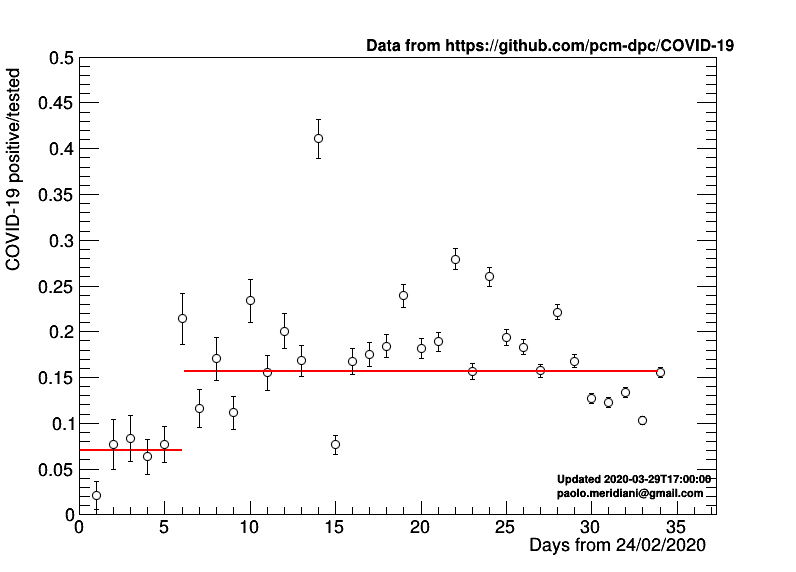

In [13]:

fracOfPositive=R.TGraphErrors()
fracOfPositive.SetName("NPositive/Tamponi")
for i,ni in enumerate(dfNational['totale_casi']):
    if (i==0):
        continue
    nt=dfNational['tamponi'][i]-dfNational['tamponi'][i-1]
    frac=dfNational['nuovi_attualmente_positivi'][i]/nt
    fracOfPositive.SetPoint(i-1,i,frac)
    fracOfPositive.SetPointError(i-1,0,R.TMath.Sqrt(frac*(1-frac)/dfNational['tamponi'][i])*10)

c1.SetLogy(0)

fracOfPositive.Draw("AP")

fracOfPositive.SetMarkerStyle(24)
fracOfPositive.SetMarkerSize(1.2)

fracOfPositive.GetXaxis().SetTitle("Days from 24/02/2020")
fracOfPositive.GetYaxis().SetTitle("COVID-19 positive/tested")
fracOfPositive.GetYaxis().SetLimits(0.,0.5)
fracOfPositive.GetYaxis().SetRangeUser(0.,0.5)

fracOfPositive.Fit("pol0","R+","",0,6)
fracOfPositive.Fit("pol0","R+","",6,fracOfPositive.GetN())

t.SetTextSize(0.03)
t.DrawLatexNDC(0.46,0.91,'Data from https://github.com/pcm-dpc/COVID-19')

t2.DrawLatexNDC(0.7,0.155,'Updated %s'%lastDate)
t2.DrawLatexNDC(0.7,0.13,'paolo.meridiani@gmail.com')

c1.Draw()
for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/fractionOfPositive"+ext)

Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/decedutiByRegion.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/decedutiByRegion.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/decedutiByRegion.root has been created
Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/terapia_intensivaByRegion.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/terapia_intensivaByRegion.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/terapia_intensivaByRegion.root has been created
Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/totale_ospedalizzatiByRegion.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/totale_ospedalizzatiByRegion.png has been created
Info in <TCanvas::SaveA

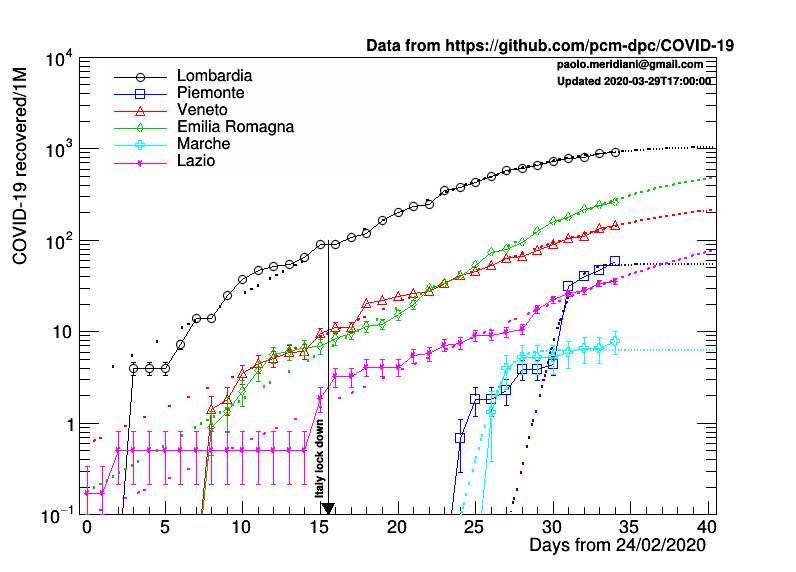

In [14]:
regions=[
    'Lombardia',
    'Piemonte',
    'Veneto',
    'Emilia Romagna',
    'Marche',
    'Lazio',
]

limits={
    'deceduti':                   0,
    'terapia_intensiva':          1E-4*1E6,
    'totale_ospedalizzati':       1E-3*1e6,
    'nuovi_attualmente_positivi': 0,
    'dimessi_guariti': 0
}

for ip,p in enumerate(regions):
    np=population.loc[p,'Population']
    for ik,k in enumerate(keys):
        graphs['%s_%s'%(k,p)]=R.TGraphErrors()
        graphs['%s_%s'%(k,p)].SetName('%s_%s'%(k,p))
        for i,ni in enumerate(df[p][k]):
            graphs['%s_%s'%(k,p)].SetPoint(i,i,float(ni)/float(np)*1E6)
            graphs['%s_%s'%(k,p)].SetPointError(i,0,R.TMath.Sqrt(ni)/np*1E6)


c1.SetLogy(1)

a3=R.TH2F("a3","a3",len(dfNational)+6,-0.5,len(dfNational)+5.5,10,1E-1,1E4)
a3.GetXaxis().SetTitle("Days from 24/02/2020")
a3.SetStats(0)
ar4=R.TArrow(15.5,1E2,15.5,1E-1,0.02,"|>")

lines={}
for ik,k in enumerate(keys):
    leg1.Clear()
    a3.Draw()
#    a3.GetYaxis().SetRangeUser(1E-6,1E-2)
    a3.GetYaxis().SetTitle("COVID-19 %s/1M"%labels[k])
    for ip,p in enumerate(regions):
        graphs['%s_%s'%(k,p)].SetLineColor(colors[ip])
        graphs['%s_%s'%(k,p)].SetMarkerColor(colors[ip])
        graphs['%s_%s'%(k,p)].SetMarkerStyle(24+ip)
        graphs['%s_%s'%(k,p)].SetMarkerSize(1.2)
        graphs['%s_%s'%(k,p)].Draw("PLSAME")
        if (k!= 'nuovi_attualmente_positivi'):
            graphs['%s_%s'%(k,p)].Fit("logit","RQB+")
            graphs['%s_%s'%(k,p)].GetFunction("logit").SetLineColor(colors[ip])
            graphs['%s_%s'%(k,p)].GetFunction("logit").SetLineStyle(3)
            
        leg1.AddEntry(graphs['%s_%s'%(k,p)],p,"PL")

    leg1.Draw()
    t.SetTextSize(0.03)
    t.DrawLatexNDC(0.46,0.91,'Data from https://github.com/pcm-dpc/COVID-19')
    t2.DrawLatexNDC(0.7,0.85,'Updated %s'%lastDate)
    t2.DrawLatexNDC(0.7,0.88,'paolo.meridiani@gmail.com')
    if limits[k]>0:
        lines[k]=R.TLine(len(dfNational)/2.,limits[k],len(dfNational)+5.5,limits[k])
        lines[k].SetLineStyle(2)
        lines[k].SetLineWidth(1)
        lines[k].Draw()
        t2.DrawLatex(len(dfNational)/2.+0.3,limits[k]*1.2,'Approximate SSN capacity')

    ar4.Draw()
    t1.DrawLatex(15.2,1.5E-1,'Italy lock down')
    c1.Draw()
    
    for ext in ['.pdf','.png','.root']:
        c1.SaveAs("~/cernbox/www/plots/COVID19/%sByRegion"%k+ext)    

